In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings 
warnings.filterwarnings("ignore")
print("TensorFlow version:", tf.__version__)
path = "/home/pers/allouche/PHY2446M/Data/"

2024-01-11 16:59:40.030974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-11 16:59:40.031021: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TensorFlow version: 2.9.0


In [4]:
data = pd.read_csv(path+"RAMAN_DATA.csv")
data
#pd.value_counts('quality')

,diagnostic,400,402,405,407,410,412,415,417,420,...,2100,2101,2103,2104,2105,2107,2108,2109,2111,2112
0,Healthy,0.0,-0.015237,-0.030607,-0.038309,-0.039078,-0.035809,-0.031176,-0.030395,-0.033311,...,-0.001685,-0.000553,0.000118,0.000566,0.001245,0.000846,0.001106,0.001005,0.000117,0.0
1,Healthy,0.0,-0.012098,-0.028164,-0.035189,-0.036138,-0.031050,-0.026015,-0.027539,-0.028084,...,-0.002085,-0.000998,0.000278,-0.000123,0.000384,0.001010,0.000583,-0.000397,-0.000160,0.0
2,Healthy,0.0,-0.013000,-0.029058,-0.035021,-0.034994,-0.033025,-0.028413,-0.028470,-0.029737,...,-0.002707,-0.001554,0.000050,0.000866,0.000877,0.000871,0.001093,0.001058,0.000614,0.0
3,Healthy,0.0,-0.015728,-0.034346,-0.045140,-0.047671,-0.044334,-0.040807,-0.040474,-0.041417,...,-0.003241,-0.001541,-0.000198,0.000202,0.001023,0.000625,0.000420,0.000543,-0.000071,0.0
4,Healthy,0.0,-0.020355,-0.045839,-0.060556,-0.065805,-0.064988,-0.062097,-0.061955,-0.064759,...,-0.002151,-0.000088,0.000891,0.000942,0.001294,0.001878,0.001739,0.001946,0.001301,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,SARS-CoV-2,0.0,-0.012075,-0.015969,-0.016275,-0.015292,-0.015369,-0.016400,-0.013721,-0.014503,...,-0.001666,-0.000538,0.000050,0.001191,0.001467,0.001823,0.001420,0.001671,0.000966,0.0
305,SARS-CoV-2,0.0,-0.017376,-0.024656,-0.025636,-0.026982,-0.027625,-0.029134,-0.027138,-0.026919,...,-0.001481,0.000275,0.000287,0.000239,0.000755,0.001314,0.001320,0.000946,0.000392,0.0
306,SARS-CoV-2,0.0,-0.011666,-0.018976,-0.019419,-0.017430,-0.017057,-0.019041,-0.021120,-0.019771,...,-0.000739,0.001393,0.001246,0.000687,0.001516,0.001923,0.002260,0.001411,0.001238,0.0
307,SARS-CoV-2,0.0,-0.011431,-0.018292,-0.017184,-0.015339,-0.016573,-0.016317,-0.016650,-0.016017,...,-0.004132,-0.002063,-0.000858,-0.000701,-0.000713,0.000067,0.000204,-0.000403,-0.001296,0.0


In [8]:
from sklearn.model_selection import train_test_split

if data.isnull().any().any():
    data = df.dropna()

data['diagnostic'] =data['diagnostic'].replace({'Healthy': 0, 'SARS-CoV-2': 1})

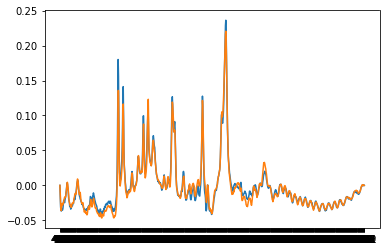

In [27]:
positive_diagnosis = data[data['diagnostic'] == 1]
negative_diagnosis = data[data['diagnostic'] == 0]
plt.plot(positive_diagnosis.iloc[1,1:], label='Positive Diagnosis (Raman)')
plt.plot(negative_diagnosis.iloc[1,1:], label='negatif (Raman)')

In [58]:
from sklearn.model_selection import train_test_split

X = data.drop(['diagnostic'], axis = 1,)
Y = data['diagnostic']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [59]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],1)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2,activation='Softmax')
])

In [60]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [62]:
model.fit(X_train, y_train, epochs=86)

Epoch 1/86
8/8 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.9433
Epoch 2/86
8/8 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.9433
Epoch 3/86
8/8 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.9393
Epoch 4/86
8/8 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.9433
Epoch 5/86
8/8 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.9393
Epoch 6/86
8/8 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.9352
Epoch 7/86
8/8 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.9352
Epoch 8/86
8/8 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.9514
Epoch 9/86
8/8 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.9433
Epoch 10/86
8/8 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.9433
Epoch 11/86
8/8 [======================

In [63]:
model.evaluate(X_test,  y_test, verbose=2)

2/2 - 0s - loss: 0.3375 - accuracy: 0.9839 - 89ms/epoch - 44ms/step


[0.33748817443847656, 0.9838709831237793]

In [75]:
y_pred = model.predict(X_test)
y_pred=tf.math.argmax(y_pred,axis=1)
print(y_pred)

2/2 [==============================] - 0s 2ms/step
tf.Tensor(
[1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1], shape=(62,), dtype=int64)


In [77]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        32

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



In [78]:
from sklearn.metrics  import confusion_matrix 
confusion_matrix(y_test, y_pred)

array([[30,  0],
       [ 1, 31]])

<AxesSubplot:>

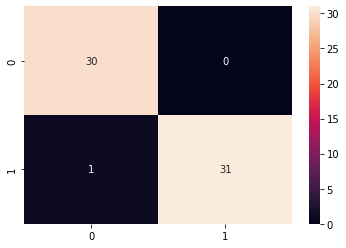

In [79]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
from sklearn.ensemble import RandomForestClassification